In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##read the dataset

In [50]:
df=pd.read_csv('data/improved_disease_dataset.csv')

##Stats of Dataset


In [51]:
df.describe()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.328000,0.413000,0.378500,0.526000,0.365500,0.450500,0.387000,0.55500,0.456000,0.449000
std,0.469602,0.492496,0.485134,0.499448,0.481691,0.497668,0.487185,0.49709,0.498185,0.497517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Shape of dataset

In [52]:
df.shape

(2000, 11)

#Display first 5 records

In [53]:
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


#check for null values

In [54]:
df.isnull().any()

fever          False
headache       False
nausea         False
vomiting       False
fatigue        False
joint_pain     False
skin_rash      False
cough          False
weight_loss    False
yellow_eyes    False
disease        False
dtype: bool

In [55]:
df.isnull().sum()

fever          0
headache       0
nausea         0
vomiting       0
fatigue        0
joint_pain     0
skin_rash      0
cough          0
weight_loss    0
yellow_eyes    0
disease        0
dtype: int64

#check for duplicate values

In [56]:
df.duplicated().sum()

np.int64(568)

#Check for datatypes

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


#check for number of unique values in each column

In [58]:
df.nunique()

fever           2
headache        2
nausea          2
vomiting        2
fatigue         2
joint_pain      2
skin_rash       2
cough           2
weight_loss     2
yellow_eyes     2
disease        38
dtype: int64

In [61]:
for i in df.columns:
    display(f"the column {i} has these unique values {df[i].unique()}")

'the column fever has these unique values [1 0]'

'the column headache has these unique values [0 1]'

'the column nausea has these unique values [1 0]'

'the column vomiting has these unique values [0 1]'

'the column fatigue has these unique values [1 0]'

'the column joint_pain has these unique values [0 1]'

'the column skin_rash has these unique values [0 1]'

'the column cough has these unique values [1 0]'

'the column weight_loss has these unique values [1 0]'

'the column yellow_eyes has these unique values [0 1]'

"the column disease has these unique values ['Paralysis (brain hemorrhage)' 'Hypertension' 'Hepatitis B' 'Impetigo'\n 'Chronic cholestasis' 'Hepatitis C' 'Typhoid'\n 'Dimorphic hemorrhoids(piles)'\n 'Vertigo (Benign paroxysmal Positional Vertigo)' 'Cervical spondylosis'\n 'Tuberculosis' 'Hyperthyroidism' 'Malaria' 'Gastroenteritis'\n 'Osteoarthritis' 'Heart attack' 'Dengue' 'Pneumonia'\n 'Urinary tract infection' 'Hypoglycemia' 'Bronchial Asthma' 'Arthritis'\n 'Hepatitis D' 'Hypothyroidism' 'Acne' 'GERD' 'Peptic ulcer disease'\n 'Psoriasis' 'Drug Reaction' 'Diabetes' 'Varicose veins' 'Hepatitis A'\n 'Hepatitis E' 'Migraine' 'Allergy' 'Jaundice' 'AIDS'\n 'Alcoholic hepatitis']"

#categorical and numerical features

In [60]:
num_feat=[feat for feat in df.columns if df[feat].dtypes!='object']
print(f" the numerical features are : {num_feat}")

cat_feat=[feat for feat in df.columns if feat not in num_feat]
print(f" the categorical features are : {cat_feat}")

 the numerical features are : ['fever', 'headache', 'nausea', 'vomiting', 'fatigue', 'joint_pain', 'skin_rash', 'cough', 'weight_loss', 'yellow_eyes']
 the categorical features are : ['disease']


can also be written as :

# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

No Feature engineering is required for this dataset

Exploring Data ( Visualization )
Visualize average score distribution to make some conclusion.
Histogram
Kernel Distribution Function (KDE)

In [ ]:
Histogram & KDE

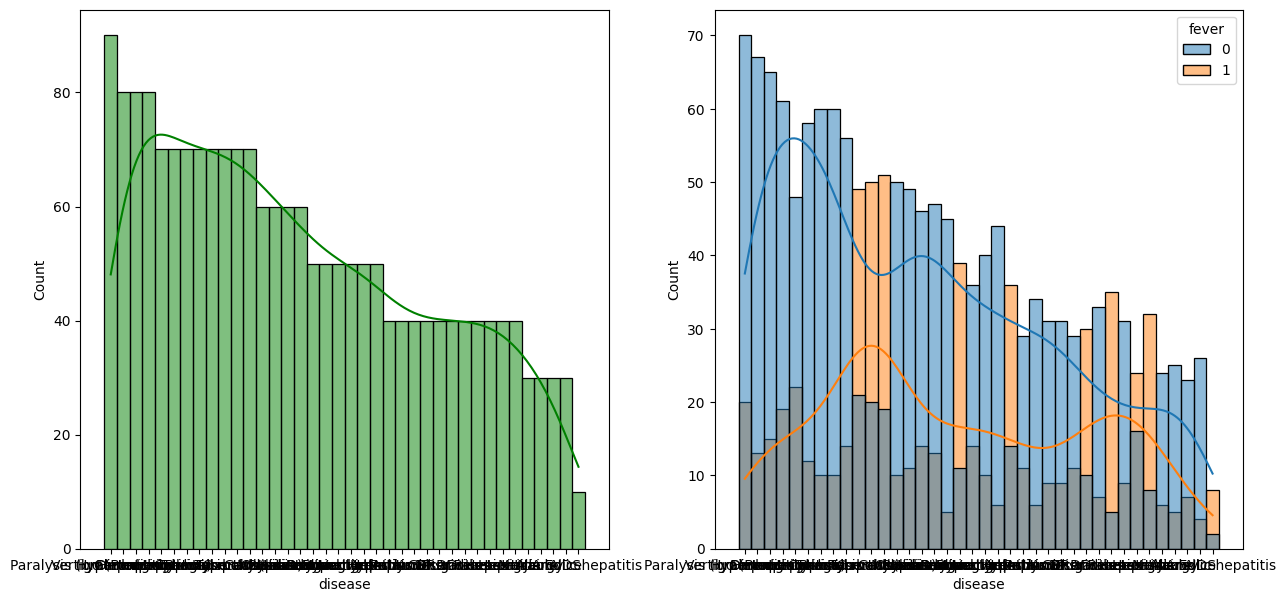

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='disease',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='disease',kde=True,hue='fever')
plt.show()

can draw for all the colunms and check the insights

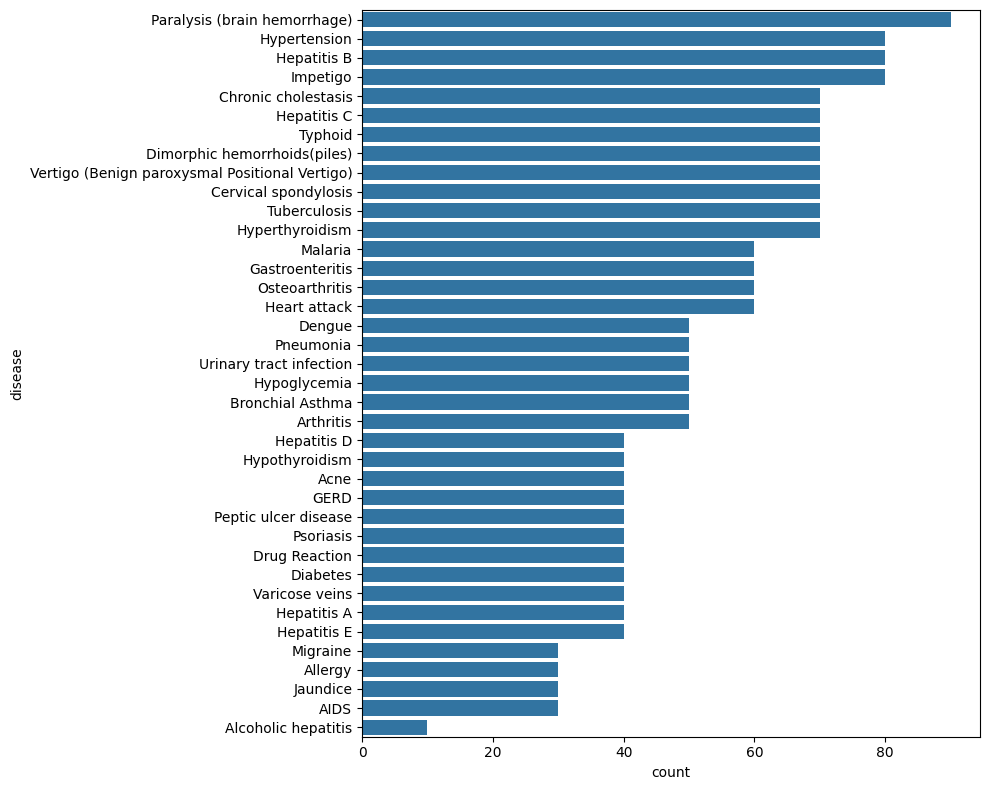

In [65]:
plt.figure(figsize=(10, 8))  # Adjust width & height
sns.countplot(data=df, y='disease')  # or sns.histplot(y='disease')
plt.tight_layout()  # Prevents clipping of labels
plt.show()

Multivariate analysis using pieplot

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

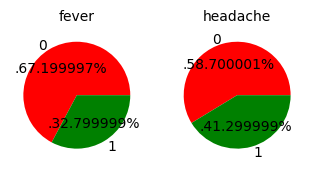

In [71]:
plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 5, 1)
size = df['fever'].value_counts()
labels = 0,1
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('fever', fontsize = 10)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['headache'].value_counts()
labels = 0,1
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('headache', fontsize = 10)
plt.axis('off')

 Feature Wise Visualization
4.4.1 GENDER COLUMN
How is distribution of Gender ?
Is gender has any impact on student's performance ?
UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

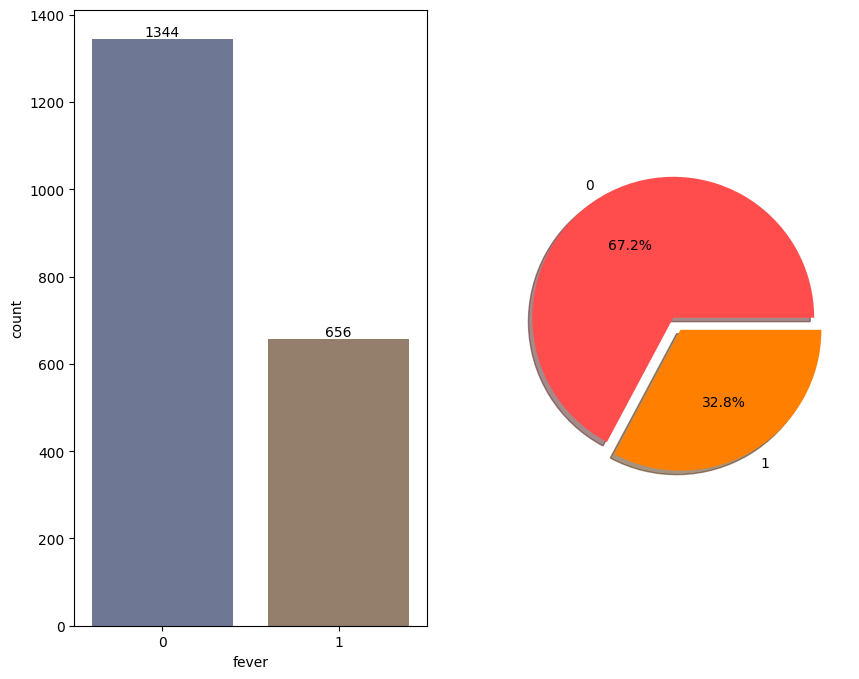

In [75]:
f,ax=plt.subplots(1,2,figsize=(10,8))
sns.countplot(x=df['fever'],data=df,palette ='bright',ax=ax[0],saturation=0.15)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['fever'].value_counts(),labels=[0,1],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

##will continue later